# VISUALISATION OF RESULTS

Import packages:

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
%matplotlib inline

Import data table with dN/dS ratios:

In [71]:
data = pd.read_csv("../results/dnds_for_targets_none.csv", index_col=0)
print(data.shape)
data.head()

(14904, 9)


,Gene name,Gene description,dN with Chimpanzee,dS with Chimpanzee,dN/dS with Chimpanzee,dN with Mouse,dS with Mouse,dN/dS with Mouse,present in DrugBank
0,MT-ATP8,mitochondrially encoded ATP synthase membrane ...,0.0325,0.3331,0.0976,0.4871,0.8480,0.5744,False
1,MT-ND6,mitochondrially encoded NADH:ubiquinone oxidor...,0.0204,0.6559,0.0311,0.3455,13.3498,0.0259,False
2,KLF13,Kruppel like factor 13 [Source:HGNC Symbol;Acc...,0.0026,0.0771,0.0337,0.0219,0.6810,0.0322,False
3,KCNE1B,potassium voltage-gated channel subfamily E re...,0.0165,0.0649,0.2542,0.1382,0.8135,0.1699,False
4,PDK3,pyruvate dehydrogenase kinase 3 [Source:HGNC S...,0.0152,0.0300,0.5067,0.0151,0.5213,0.0290,False


In [72]:
data_filtered = data.dropna()
print(data_filtered.shape)
data_filtered = data_filtered[(data_filtered["dN/dS with Chimpanzee"] != float("inf")) & (data_filtered["dN/dS with Mouse"] != float("inf"))]
print(data_filtered.shape)
data_filtered.head()

(11880, 9)
(11478, 9)


,Gene name,Gene description,dN with Chimpanzee,dS with Chimpanzee,dN/dS with Chimpanzee,dN with Mouse,dS with Mouse,dN/dS with Mouse,present in DrugBank
0,MT-ATP8,mitochondrially encoded ATP synthase membrane ...,0.0325,0.3331,0.0976,0.4871,0.8480,0.5744,False
1,MT-ND6,mitochondrially encoded NADH:ubiquinone oxidor...,0.0204,0.6559,0.0311,0.3455,13.3498,0.0259,False
2,KLF13,Kruppel like factor 13 [Source:HGNC Symbol;Acc...,0.0026,0.0771,0.0337,0.0219,0.6810,0.0322,False
3,KCNE1B,potassium voltage-gated channel subfamily E re...,0.0165,0.0649,0.2542,0.1382,0.8135,0.1699,False
4,PDK3,pyruvate dehydrogenase kinase 3 [Source:HGNC S...,0.0152,0.0300,0.5067,0.0151,0.5213,0.0290,False


## Chimpanzee stats

#### dN/dS distributions

Ha: not in drugbank > in drugbank
Mann-Whitney U Test p-value:  6.134698544790866e-11


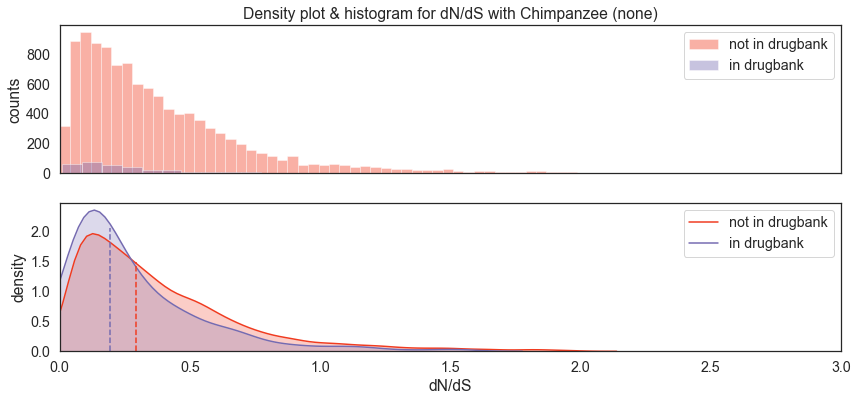

In [75]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Chimpanzee"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Chimpanzee"].median()

print("Ha: not in drugbank > in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Chimpanzee"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Chimpanzee"], alternative='greater').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.6, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.83, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dN/dS with Chimpanzee (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,3)
plt.savefig("../results/pictures/dnds_Chimp_none.png")
plt.show();

#### dN distributions

Ha: not in drugbank > in drugbank
Mann-Whitney U Test p-value:  3.335866710191571e-06


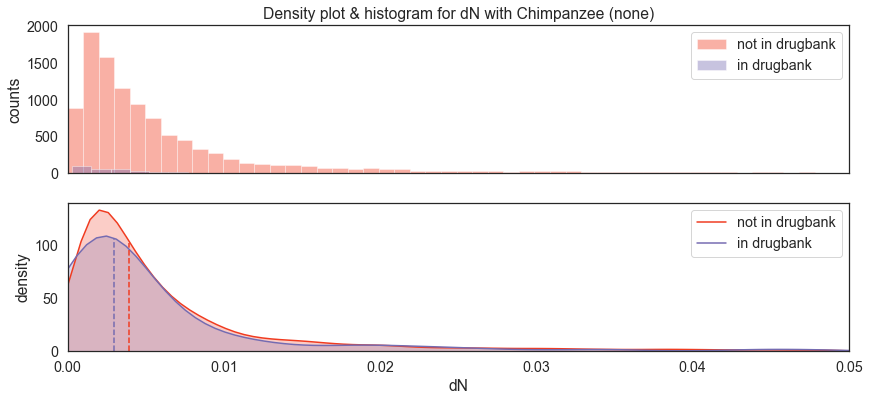

In [80]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN with Chimpanzee"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN with Chimpanzee"].median()

print("Ha: not in drugbank > in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN with Chimpanzee"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dN with Chimpanzee"], alternative='greater').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN with Chimpanzee"] < 0.05)]["dN with Chimpanzee"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN with Chimpanzee"] < 0.05)]["dN with Chimpanzee"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN with Chimpanzee"] < 0.05)]["dN with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN with Chimpanzee"] < 0.05)]["dN with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.73, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.76, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dN with Chimpanzee (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dN")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,0.05)
plt.savefig("../results/pictures/dn_Chimp_none.png")
plt.show();


#### dS distributions

Ha: not in drugbank < in drugbank
Mann-Whitney U Test p-value:  0.044761634216701165


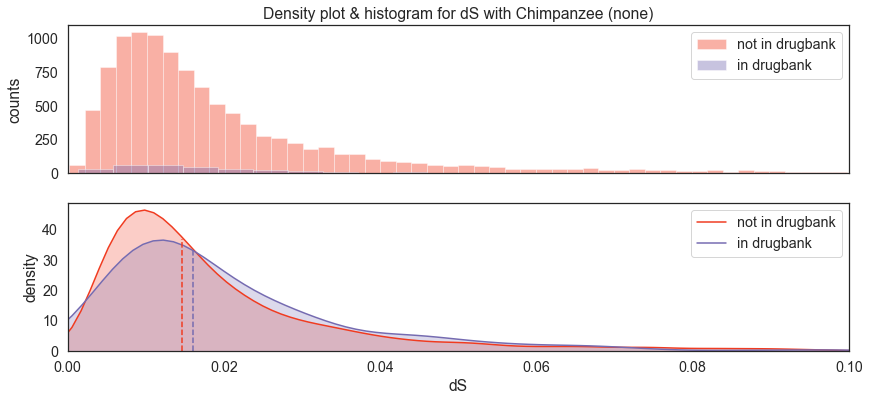

In [83]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dS with Chimpanzee"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dS with Chimpanzee"].median()

print("Ha: not in drugbank < in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dS with Chimpanzee"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dS with Chimpanzee"], alternative='less').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dS with Chimpanzee"] < 0.1)]["dS with Chimpanzee"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dS with Chimpanzee"] < 0.1)]["dS with Chimpanzee"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dS with Chimpanzee"] < 0.1)]["dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dS with Chimpanzee"] < 0.1)]["dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.76, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.7, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dS with Chimpanzee (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dS")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,0.1)
plt.savefig("../results/pictures/ds_Chimp_none.png")
plt.show();

## Mouse stats

#### dN/dS distributions

Ha: not in drugbank > in drugbank
Mann-Whitney U Test p-value:  5.461043578414628e-10


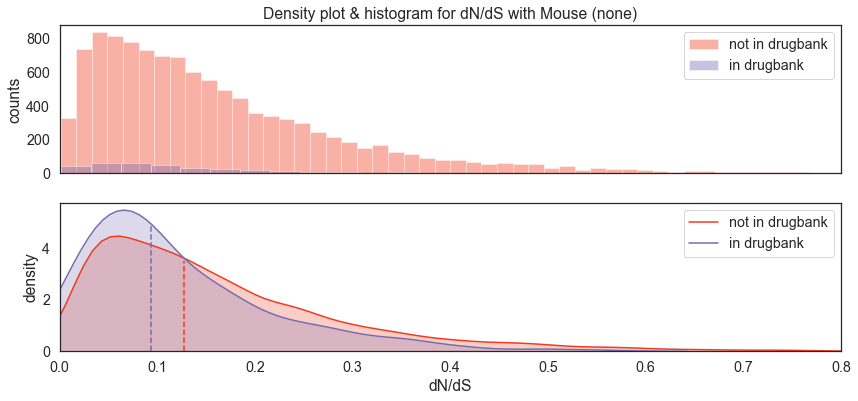

In [85]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Mouse"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Mouse"].median()

print("Ha: not in drugbank > in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Mouse"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Mouse"], alternative='greater').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 0.8)]["dN/dS with Mouse"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 0.8)]["dN/dS with Mouse"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 0.8)]["dN/dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 0.8)]["dN/dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.61, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.85, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dN/dS with Mouse (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,0.8)
plt.savefig("../results/pictures/dnds_Mouse_none.png")
plt.show();


#### dN distributions

Ha: not in drugbank > in drugbank
Mann-Whitney U Test p-value:  1.0708390044046096e-07


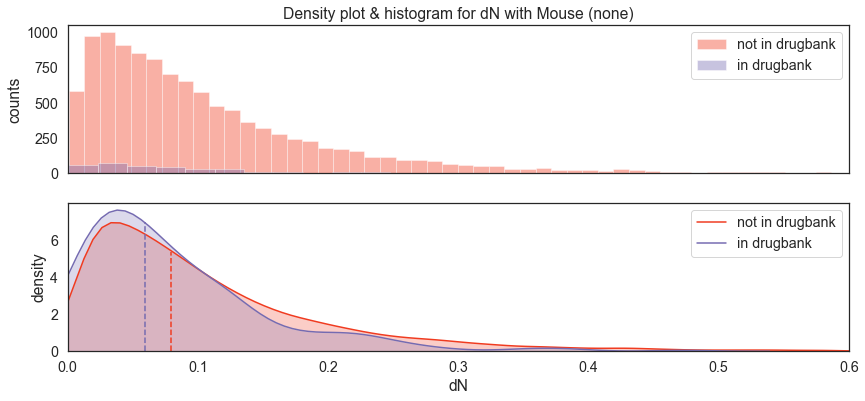

In [90]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN with Mouse"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN with Mouse"].median()

print("Ha: not in drugbank > in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN with Mouse"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dN with Mouse"], alternative='greater').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN with Mouse"] < 0.6)]["dN with Mouse"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN with Mouse"] < 0.6)]["dN with Mouse"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN with Mouse"] < 0.6)]["dN with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN with Mouse"] < 0.6)]["dN with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.67, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.87, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dN with Mouse (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dN")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,0.6)
plt.savefig("../results/pictures/dn_Mouse_none.png")
plt.show();


#### dS distributions

Ha: not in drugbank < in drugbank
Mann-Whitney U Test p-value:  0.10213492133318341


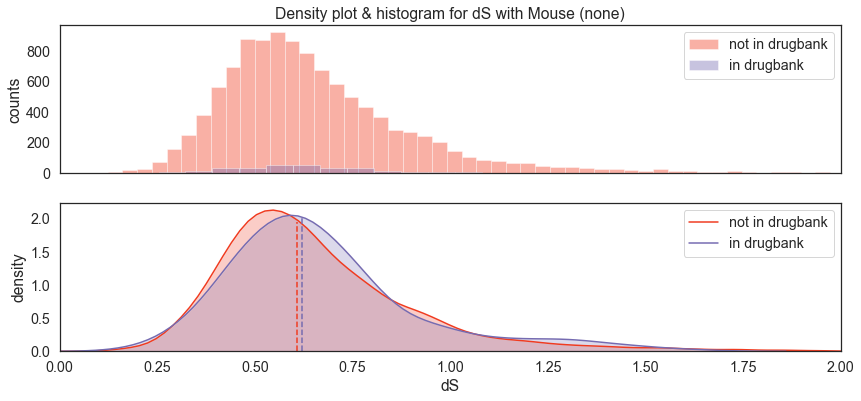

In [91]:
med_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dS with Mouse"].median()
med_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dS with Mouse"].median()

print("Ha: not in drugbank < in drugbank\nMann-Whitney U Test p-value: ", mannwhitneyu(data_filtered[(data_filtered["present in DrugBank"] == False)]["dS with Mouse"], data_filtered[(data_filtered["present in DrugBank"] == True)]["dS with Mouse"], alternative='less').pvalue)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dS with Mouse"] < 2)]["dS with Mouse"] , color="#f03b20", label="not in drugbank", kde=False, ax=ax1)
sns.distplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dS with Mouse"] < 2)]["dS with Mouse"] , color="#756bb1", label="in drugbank", kde=False, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dS with Mouse"] < 2)]["dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dS with Mouse"] < 2)]["dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.axvline(med_out, 0, 0.87, color="#f03b20").set_linestyle("--")
ax2.axvline(med_in, 0, 0.9, color="#756bb1").set_linestyle("--")

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Density plot & histogram for dS with Mouse (none)')
ax1.set_xlabel('')
ax2.set_xlabel("dS")
ax1.set_ylabel('counts')
ax2.set_ylabel('density')

plt.xlim(0,2)
plt.savefig("../results/pictures/ds_Mouse_none.png")
plt.show();
